# Evaluating Model Runs

Purpose of this notebook is to display the results of different tests

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

datapath = Path.home() / "Box/NASA_Figures/data/validation"

plt.style.use("ggplot")

## Show Simulations against validation

In [87]:
model_name = "qr_test5"
sims = pd.read_csv(datapath / f"predictions/{model_name}.csv")
sims

,theta,x,sim_id,valid_id,sim,t,set_id
0,0.517349,0.151966,0.0,0,True,0.000000,0
1,0.695766,0.082768,0.0,0,True,0.010002,0
2,0.531630,-0.054015,0.0,0,True,0.020004,0
3,0.489518,-0.100521,0.0,0,True,0.030006,0
4,0.309435,-0.056639,0.0,0,True,0.040008,0
...,...,...,...,...,...,...,...
634995,3.717504,12.230249,NaN,1,False,49.959992,0
634996,3.675000,12.395561,NaN,1,False,49.969994,0
634997,3.573947,12.256772,NaN,1,False,49.979996,0
634998,3.793910,12.538734,NaN,1,False,49.989998,0


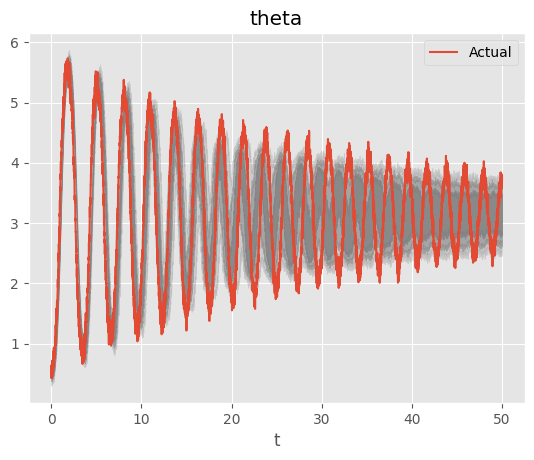

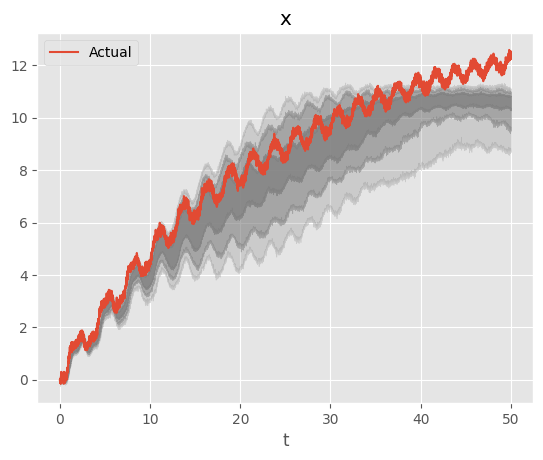

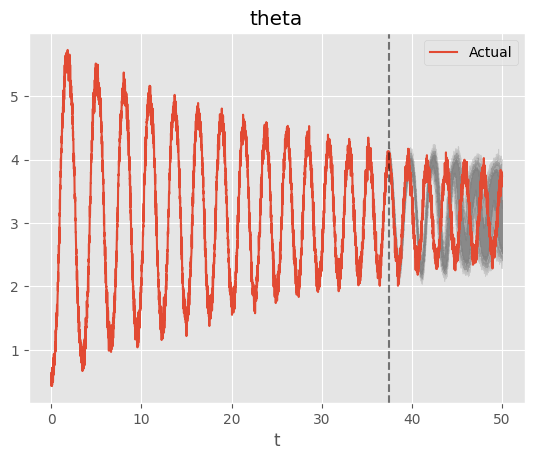

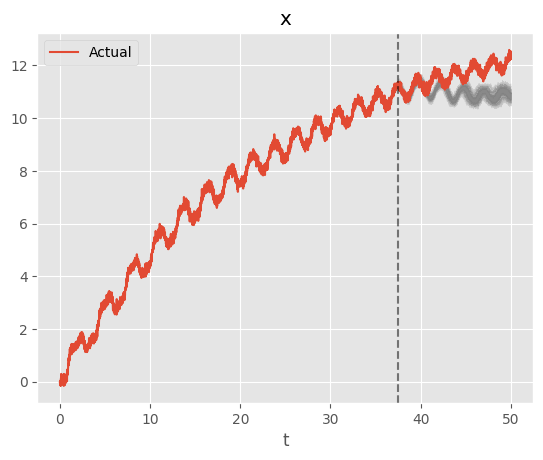

In [88]:
# Pivot sims wide
wide = {}
conf_ints = [0.5, 0.8, 0.95]
for valid_id in sims.valid_id.unique():
    for col in ["theta", "x"]:
        wide[col] = pd.pivot_table(sims[sims.sim & (sims.valid_id == valid_id)], index="t", columns="sim_id", values=col)

        # Plot
        fig, ax = plt.subplots(dpi=100)
        for i, a in enumerate(reversed(sorted(conf_ints))):
            a2 = (1 - a) / 2
            ax.fill_between(
                wide[col].index,
                y1=np.quantile(wide[col], a2, axis=1),
                y2=np.quantile(wide[col], 1 - a2, axis=1),
                alpha=0.25 * (i + 1),
                color="gray",
                label="",
            )
        set_id = sims.loc[sims.valid_id == valid_id, "set_id"].iloc[0]
        sims.loc[~sims.sim & (sims.set_id == set_id), ["t", col]].drop_duplicates().plot(x="t", y=col, label="Actual", ax=ax)
        if wide[col].index.min() != sims.loc[sims.set_id == set_id, "t"].min():
            ax.axvline(wide[col].index.min(), ls="--", c="k", alpha=0.5)
        ax.set_title(col)
        plt.show()